# Практическая работа №2

Выполнил студент группы М06-106н Кочетков Дмитрий Андреевич.

## Постановка задачи

Задача: реализовать жадный алгоритм для решения задачи о непрерывном рюкзаке.

## Алгоритм

Жадный алгоритм на каждом шаге осуществляет принятие локально оптимального решения. В случае задачи о непрерывном рюкзаке это оптимальное решение заключается в последовательном выборе предмета наибольшего веса с наибольшей стоимостью среди оставшихся предметов. 

Если же вес предмета меньше, чем оставшееся место в рюкзаке, от предмета берется часть, равная оставшейся ёмкости рюкзака.

In [2]:
"""
Жадный алгоритм, решающий непрерывную задачу о рюкзаке.

Параметры: 

- items: list. Список предметов - кортежей вида (цена, вес).
- capacity: int. Вместимость рюкзака.
"""
def greedy_knapsack(items: list, capacity: int) -> float:
    order = [(price / weight, weight) for price, weight in items]
    order.sort(reverse=True)

    result = 0.0
    for cost, weight in order:
        if weight < capacity:
            result += cost * weight
            capacity -= weight
        else:
            result += cost * capacity
            break

    return result

Оценим сложность алгоритма. Функция `greedy_knapsack` осуществляет следующие операции:

1. Составление массива `order` с удельными ценами и весами предеметов, $O(n)$ операций.
2. Сортировка массива `order` по убыванию удельных цен, $ O(n \log n) $ операций (quick sort).
3. Перебор $n$ предметов. В случае, если вес предмета меньше оставшегося места в рюкзаке, предмет берется полностью, совершается 2 операции. В противном случае перебор заканчивается взятием части предмета, равной оставшейся ёмкости рюкзака.

Таким образом, сложность алгоритма $ O(n \log n) $.

In [3]:
greedy_knapsack(
    items=[
        (60, 20),
        (100, 50),
        (120, 30)
    ],
    capacity=50
)

180.0

In [4]:
# Нулевая ёмкость
greedy_knapsack(
    items=[
        (60, 20),
        (100, 50),
        (120, 30)
    ],
    capacity=0
)

0.0

In [5]:
# Ёмкость меньше минимального веса предмета
greedy_knapsack(
    items=[
        (60, 20),
        (100, 50),
        (120, 30)
    ],
    capacity=10
)

40.0

Построим график зависимости времени работы алгоритма от размера входных данных. Для того чтобы обеспечить полный перебор предметов, будем выбирать ёмкость рюкзака заведомо больше, чем сумма всех весов.

In [10]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from random import randint
from tqdm import tqdm

In [11]:
execution_time = list()
n_max = 2000
for n in tqdm(range(1, n_max)):
    items = list()
    sum_of_weights = 0
    for i in range(n):
        price = randint(1, 10000)
        weight = randint(1, 10000)
        sum_of_weights += weight
        items.append((price, weight))
        items.sort() # для оценки времени работы алгоритма в худшем случае. Это не совсем верно, тут должна быть более сложная сортировка.
    capacity = sum_of_weights // 2
    start_time = time.time()
    greedy_knapsack(items, capacity)
    execution_time.append(time.time() - start_time)

100%|██████████| 1999/1999 [01:55<00:00, 17.37it/s] 


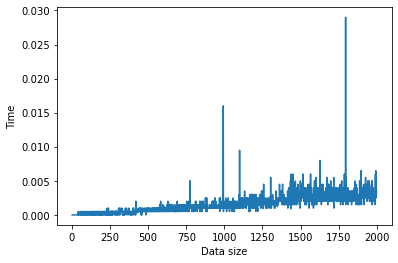

In [12]:
plt.plot(range(1, n_max), execution_time)
plt.xlabel('Data size')
plt.ylabel('Time')
plt.show()

## Вывод

В практической работе №2 был реализован жадный алгоритм для решения задачи о непрерывном рюкзаке, указан критерий жадного выбора. Алгоритм протестирован на нескольких наборах входных данных.